<a href="https://colab.research.google.com/github/nveenkumr/Lending-Club-Case-Study/blob/master/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Case Study 

## Business Objective
 -  You work for a consumer finance company which is specialized in lending loans to urban customers
 - objective is to find out the main drivers  which provide strong indication of deafulting a loan         
   application.

### Step1 :-  Data Understanding

In [1]:
#import libraries
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# loading the data 
dfloan = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip" , encoding = "ISO-8859-1" ,low_memory=False)
#dfloan = pd.read_csv("loan.csv" , encoding = "ISO-8859-1" ,low_memory=False)

In [3]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
dfloan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# generic function to check the percentage of null columns
def calnullpercentage(mdf):
    print(mdf.isnull().sum()/len(mdf.index) *100)

### Checking the null percentage of columns in main datafranme dfloan

In [7]:
# checking the null percentage of columns in this dataframe dfloan
calnullpercentage(dfloan)


id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

#### As we can see most of the columns contains 100% null values . Hence lets remove those values.

In [8]:
#Remove the columns contains 100% null values 
dfloan1 = dfloan[dfloan.columns[~dfloan.isnull().all()]]
dfloan1.shape

(39717, 57)

In [9]:
calnullpercentage(dfloan1)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Creating Generic Column overview table which will display the columns information like their datatypes MissingVal , Unique values , Top Value 

In [10]:
def ColsOverview(ldf):
    loanColsOverview = pd.DataFrame(ldf.dtypes, columns=['dtypes'])
    loanColsOverview['colName'] = loanColsOverview.index
    loanColsOverview =loanColsOverview.reset_index()
    loanColsOverview = loanColsOverview[['colName', 'dtypes']]
    loanColsOverview['Missingval'] = ldf.isnull().sum().values
    loanColsOverview['UniqueVal'] = ldf.nunique().values  
    
    loanColsOverview['TopVal'] = [ ldf[i].value_counts().index[0] for i in ldf.columns ]
    return loanColsOverview

In [11]:
#[ dfloan1[i].value_counts().index[1:2].astype('str') for i in dfloan1.columns ]

In [12]:
dfsummary = ColsOverview(dfloan1)
dfsummary

,colName,dtypes,Missingval,UniqueVal,TopVal
0,id,int64,0,39717,1052670
1,member_id,int64,0,39717,745584
2,loan_amnt,int64,0,885,10000
3,funded_amnt,int64,0,1041,10000
4,funded_amnt_inv,float64,0,8205,5000
5,term,object,0,2,36 months
6,int_rate,object,0,371,10.99%
7,installment,float64,0,15383,311.11
8,grade,object,0,7,B
9,sub_grade,object,0,35,B3


###  There are many columns with only 1 unique value means these columns doesnt have any variance and  can be dropped out  from loan analysis
- pymnt_plan,
- initial_list_status,
- collections_12_mths_ex_med,
- policy_code,
- application_type,
- acc_now_delinq,
- chargeoff_within_12_mths,
- delinq_amnt,
- tax_liens


In [13]:
# logic to exclude the columns which doesnt add any variance 
colswithoneval = dfsummary[dfsummary.UniqueVal==1]['colName'].to_list()
dfloan1 = dfloan1.loc[:,~dfloan1.columns.isin(colswithoneval)]

In [14]:
calnullpercentage(dfloan1)

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

### Still there are columns like mths_since_last_delinq ,mths_since_last_record,next_pymnt_d having null values greater than 60 % and will not be adding any value to our analysis , hence removing those columns

In [15]:
# Removing column with 60 % null values
dfloan1 = dfloan1[dfloan1.columns[ ~(((dfloan1.isnull().sum()/dfloan1.shape[0])*100) >60)]]


#### Removing the description column also as it contain 32 % null vals and will not help in analysing the top 5 loan default indicators or drivers 

In [16]:

dfloan1 = dfloan1.loc[:,~dfloan1.columns.isin(['desc' , 'url'])]


#### Employee title has 6 % null values , and cannot be imputed with any value as every person has its own job titile , title of loan has 0.024156 values   , last_pymnt_d has 0.178 null values
#### Hence remove the rows where employee title , title , lastpayment_date  is null

In [17]:

dfloan1= dfloan1[~dfloan1.emp_title.isnull()]
dfloan1= dfloan1[~dfloan1.title.isnull()]
dfloan1 = dfloan1[~dfloan1.last_pymnt_d.isnull()]

In [18]:
calnullpercentage(dfloan1)

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  0.000000
emp_length                 0.150598
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

### Analyzing Emp_length , revolving balance utilization  and public record bankrupties before excluding null values 

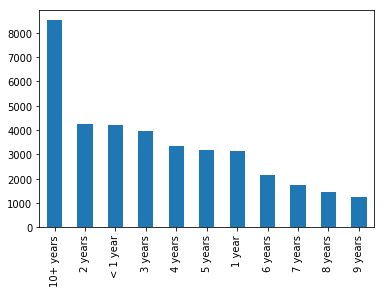

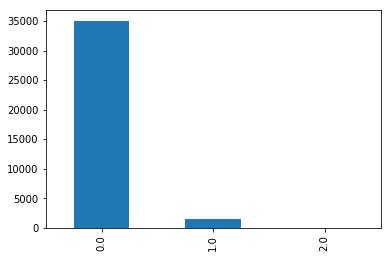

count    37143.000000
mean        49.155014
std         28.216397
min          0.000000
25%         26.000000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

In [19]:
dfloan1.emp_length.value_counts().plot.bar()
plt.show()

dfloan1.pub_rec_bankruptcies.value_counts().plot.bar()
plt.show()

dfloan1.revol_util.str.replace('%','').astype(float).describe()

### It shows that employees having 10+ years of experience has applied for loans even  0 bankruptcies for most of the customers , revolving utilization contains 0.11 % null values  with standard deviation of 28. Hence for these null values can be removed


In [20]:
dfloan1= dfloan1[~dfloan1.emp_length.isnull()]
dfloan1 = dfloan1[~dfloan1.pub_rec_bankruptcies.isnull()]
dfloan1 = dfloan1[~dfloan1.revol_util.isnull()]


In [21]:
ColsOverview(dfloan1)

,colName,dtypes,Missingval,UniqueVal,TopVal
0,id,int64,0,36433,1052670
1,member_id,int64,0,36433,745584
2,loan_amnt,int64,0,863,10000
3,funded_amnt,int64,0,1024,10000
4,funded_amnt_inv,float64,0,7474,5000
5,term,object,0,2,36 months
6,int_rate,object,0,334,10.99%
7,installment,float64,0,14367,311.11
8,grade,object,0,7,B
9,sub_grade,object,0,35,B3


In [22]:
dfloan1.shape

(36433, 43)

## Now we have cleaned all the null values , lets take copy of dfloan1 to dfloan2 for further analysis

In [23]:
dfloan2 = dfloan1.copy()
dfloan2.shape

(36433, 43)

In [24]:
dfloan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


# Univariate Analysis

Univariate analysis on categorical parameters

In [25]:
# Defining a common function to plot graphs for univariate analysis

def plotUnivariate(dataFrameName, categorical_var, graphTitle, xLabel, yLabel, rotation, figsize_x, figsize_y, order_list=None):
    plt.figure(figsize=(figsize_x,figsize_y))
    sns.countplot(x=categorical_var, data=dataFrameName, order=order_list)    
    plt.title(graphTitle, fontsize=16)
    plt.ylabel(yLabel, fontsize=12)
    plt.xlabel(xLabel, fontsize=12)
    plt.xticks(rotation = rotation)
    plt.show();

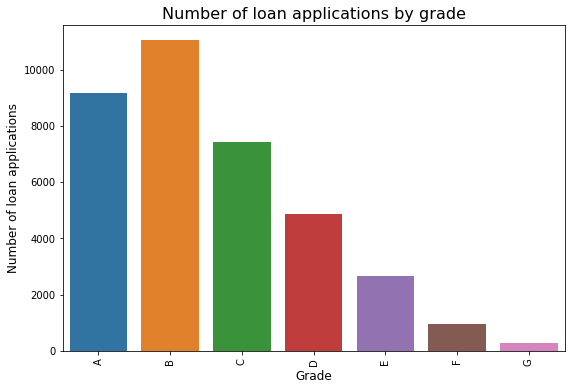

In [26]:
# Plotting grade against the number of loan applications

sorted_list = sorted(dfloan2.grade.value_counts().index.tolist())

plotUnivariate(dfloan2, 'grade', 'Number of loan applications by grade', 'Grade', 'Number of loan applications', 90, 9, 6, sorted_list)

### The maximum number of loan applications are done by Grade B closely followed by Grade A and Grade C.
### The lowest number are loan applications are done by Grade G.
###  It can also be observed that as the Grade goes from A to G, the number of loan application goes down considerably.

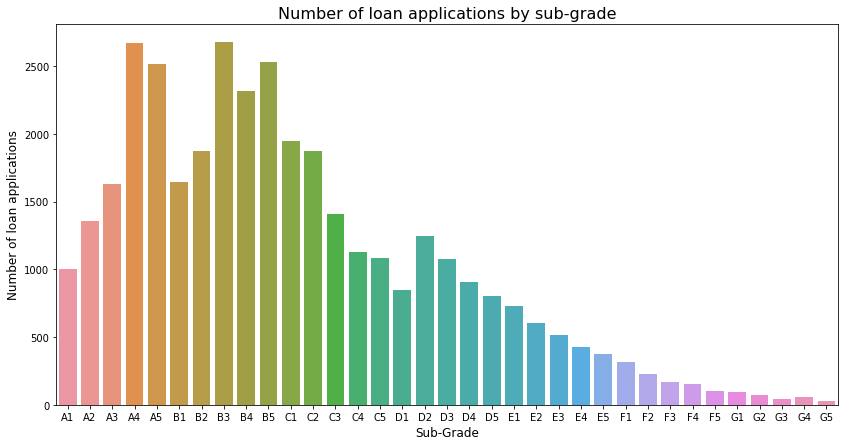

In [27]:
# Plotting sub-grade against the number of loan applications

sorted_list = sorted(dfloan2.sub_grade.value_counts().index.tolist())

plotUnivariate(dfloan2, 'sub_grade', 'Number of loan applications by sub-grade', 'Sub-Grade', 'Number of loan applications', 0, 14, 7, sorted_list)

It can be observed that there is a steady decrease in the number of loan applications from Grade C to Grade G

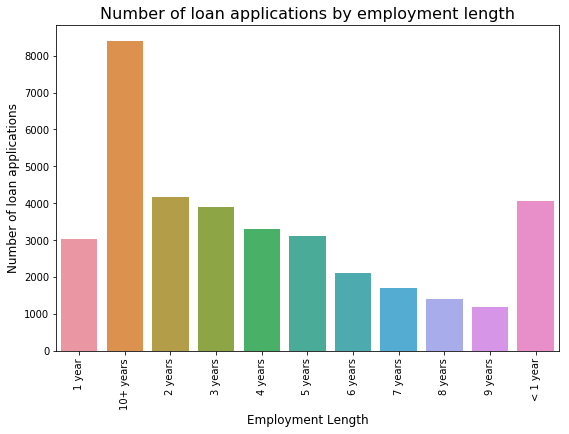

In [28]:
# Plotting grade against the number of loan applications

sorted_list = sorted(dfloan2.emp_length.value_counts().index.tolist())

plotUnivariate(dfloan2, 'emp_length', 'Number of loan applications by employment length', 'Employment Length', 'Number of loan applications', 90, 9, 6, sorted_list)

It can be observed that more or less the number of loan applications steadily goes down as the employment duration increases. 
However, the ones with more than 10 years of employment is the exceptional case as it constitutes the majoirty of the loan applications

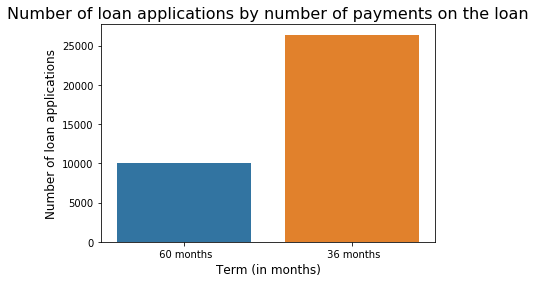

In [29]:
# Plotting term against the number of loan applications

plotUnivariate(dfloan2, 'term', 'Number of loan applications by number of payments on the loan', 'Term (in months)', 'Number of loan applications', 0, 6, 4)

It can be observed that majority of loan applications are made for shorter term

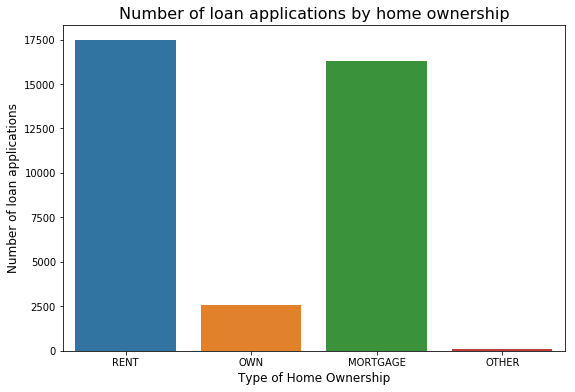

In [30]:
# Plotting type of home ownership against the number of loan applications

plotUnivariate(dfloan2, 'home_ownership', 'Number of loan applications by home ownership', 'Type of Home Ownership', 'Number of loan applications', 0, 9, 6)

It can be observed that majoirty of applications are made by borrowers who does not own their home.

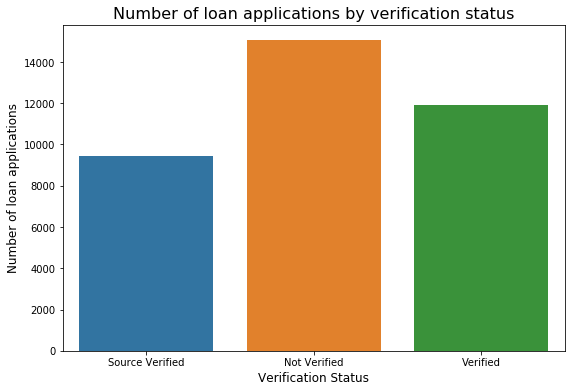

In [31]:
# Plotting verification status against the number of loan applications

plotUnivariate(dfloan2, 'verification_status', 'Number of loan applications by verification status', 'Verification Status', 'Number of loan applications', 0, 9, 6)

It can be observed that for majoirty of the loan applications, the income was not verified by LC (Lending Club). 
Income verification would require the borrower to furnish documents like paystubs, IRS Forms W-2, or other tax records

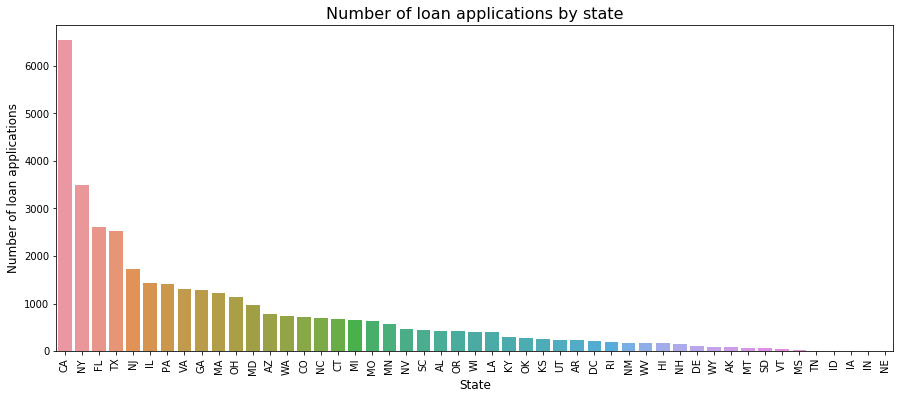

In [32]:
# Plotting state address against the number of loan applications

sorted_list = dfloan2.addr_state.value_counts().index.tolist()

plotUnivariate(dfloan2, 'addr_state', 'Number of loan applications by state', 'State', 'Number of loan applications', 90, 15, 6, sorted_list)

It can be observed that majoirty of the loan applications are made in the mega cities of United States like California, 
New York, Florida. However, the most number of loan applications come from California

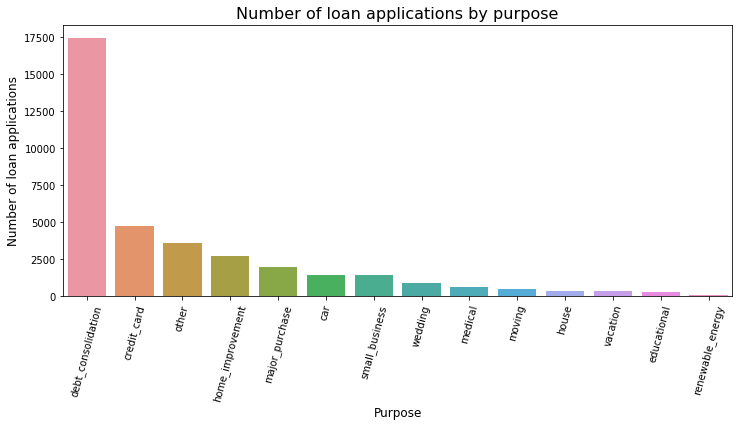

In [33]:
# Plotting purpose against the number of loan applications

sorted_list = dfloan2.purpose.value_counts().index.tolist()

plotUnivariate(dfloan2, 'purpose', 'Number of loan applications by purpose', 'Purpose', 'Number of loan applications', 75, 12, 5, sorted_list)

It can be observed that most of the loan applications are made for debt consolidation. 
i.e. Majority of the loan applications are made to pay off other loans

In [34]:
# Creating the drevied column for month and year from the issue_d (Issue Date) column to understand the data month-wise as well as year-wise.
# This new month and year column would be our type driven metric

# Formatting the values in the issue_d column

from datetime import datetime
dfloan2['issue_d'] = dfloan2['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_d and storing in the derived column month and year respectively
dfloan2['month'] = dfloan2['issue_d'].apply(lambda x: x.month)
dfloan2['year'] = dfloan2['issue_d'].apply(lambda x: x.year)

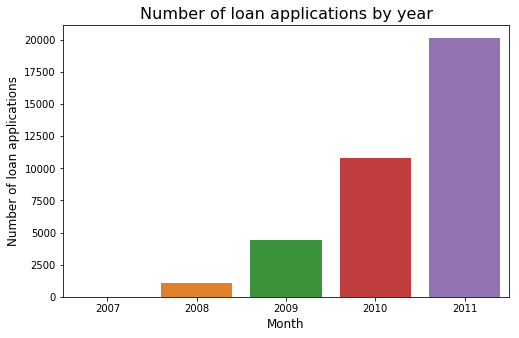

In [35]:
# Plotting year of issuing loan against the number of loan applications

sorted_list = sorted(dfloan2.year.value_counts().index.tolist())

plotUnivariate(dfloan2, 'year', 'Number of loan applications by year', 'Month', 'Number of loan applications', 0, 8, 5, sorted_list)

It can be observed the that lending clubs are processing more and more number of loan applications as the years progresses

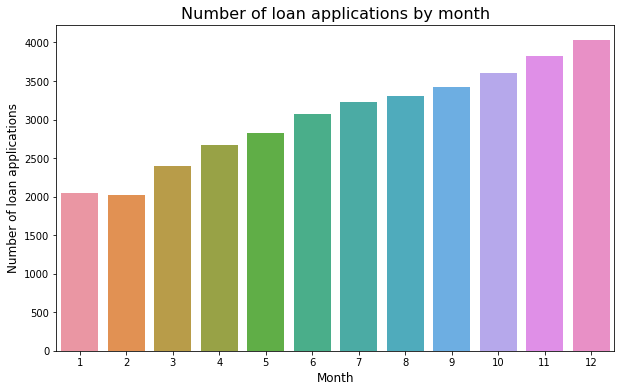

In [36]:
# Plotting month of issuing loan against the number of loan applications

sorted_list = sorted(dfloan2.month.value_counts().index.tolist())

plotUnivariate(dfloan2, 'month', 'Number of loan applications by month', 'Month', 'Number of loan applications', 0, 10, 6, sorted_list)

It can be observed thayt most number of loan applications are made in the month of December.

It can also be observed that as the year progresses, the number of loan applications increases.

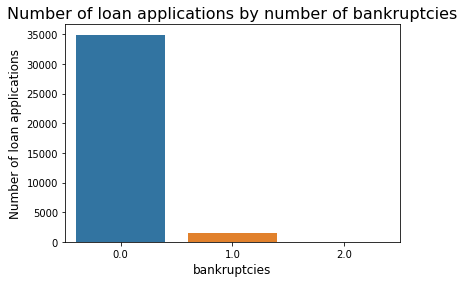

In [37]:
# plotting bankruptcies against number of loan applications

plotUnivariate(dfloan2, 'pub_rec_bankruptcies', 'Number of loan applications by number of bankruptcies', 'bankruptcies', 'Number of loan applications', 0, 6, 4)

### As we can see for most of the people has no  public bankruptcies records

In [38]:
def plotboxonevar(df, graphTitle, figsize_x, figsize_y ):
    plt.figure(figsize=[figsize_x,figsize_y])
    plt.title(graphTitle, fontsize=16)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=df )
    plt.show()

In [39]:
def snsdist(df, graphTitle, bins, figsize_x, figsize_y ):
    plt.figure(figsize=[8,6])
    plt.title(graphTitle, fontsize=16)
    sns.distplot(df ,norm_hist=False,kde=False,  bins= bins ,hist_kws={"alpha": 1} ).set( ylabel='Count');
    plt.show()
    

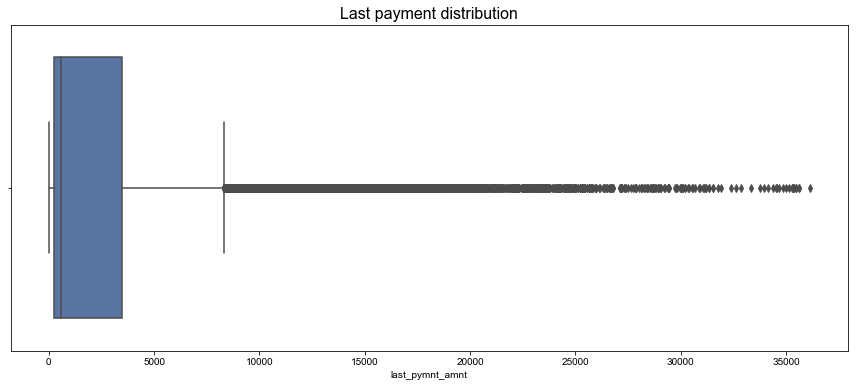

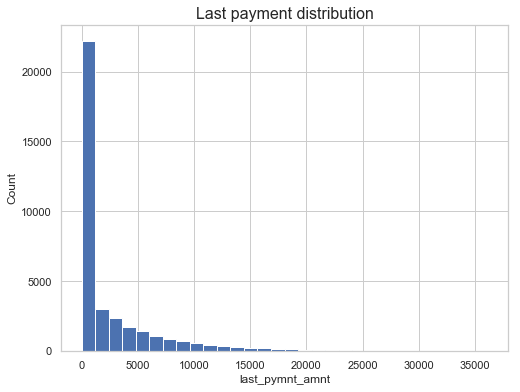

count    36433.000000
mean      2742.955476
std       4473.528922
min          0.010000
25%        226.280000
50%        571.700000
75%       3457.580000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

In [40]:
# checking the distribution of last payment 
plotboxonevar(dfloan2["last_pymnt_amnt"] , 'Last payment distribution', 15 , 6)
snsdist(dfloan2["last_pymnt_amnt"] , 'Last payment distribution', 30,  6 , 4)
dfloan2["last_pymnt_amnt"].describe()

#### As we can see most of the people tends to pay less amount , 75% values beyond 3457 and max value is 36k.

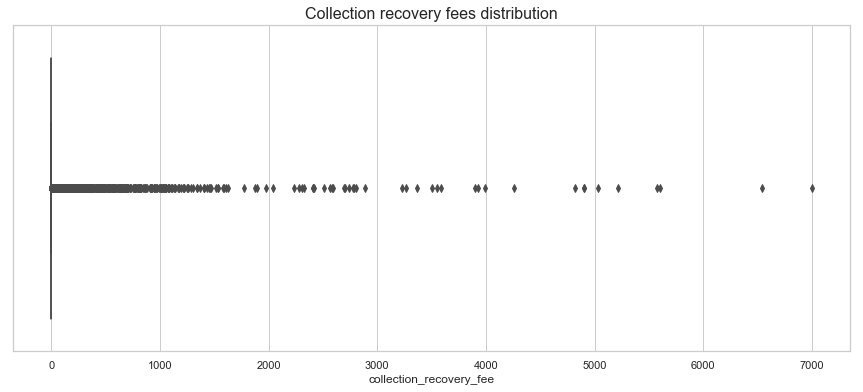

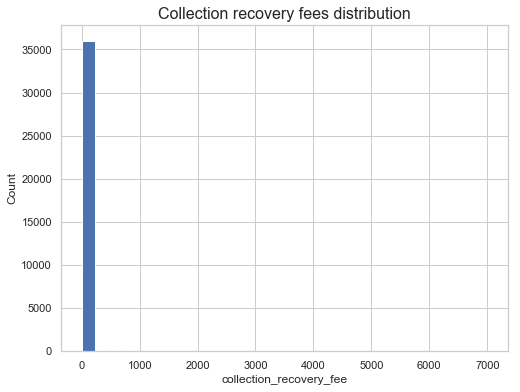

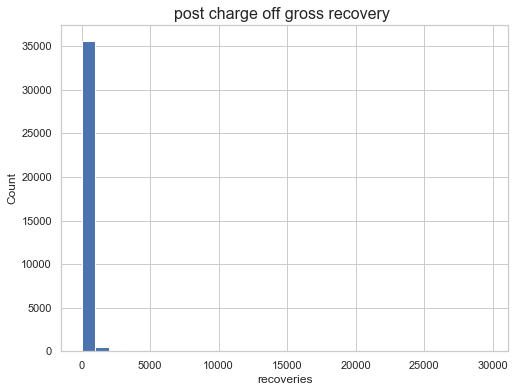

,collection_recovery_fee,recoveries
count,36433.000000,36433.000000
mean,11.677065,92.855490
std,140.880327,682.047187
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,7002.190000,29623.350000


In [41]:
#checking collection recovery fees distribution 
plotboxonevar(dfloan2["collection_recovery_fee" ] , 'Collection recovery fees distribution', 15 , 6)
snsdist(dfloan2["collection_recovery_fee"] , 'Collection recovery fees distribution', 30,  6 , 4)
dfloan2["collection_recovery_fee"].describe()
snsdist(dfloan2["recoveries"] , 'post charge off gross recovery ', 30,  6 , 4)
dfloan2[["collection_recovery_fee","recoveries" ]].describe()


#### In most of the loan there is no recovery  or may be we can say not required , further analysis could be done in segmented  univariate for charged off loans

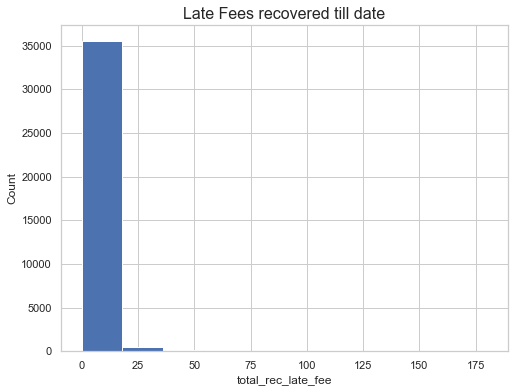

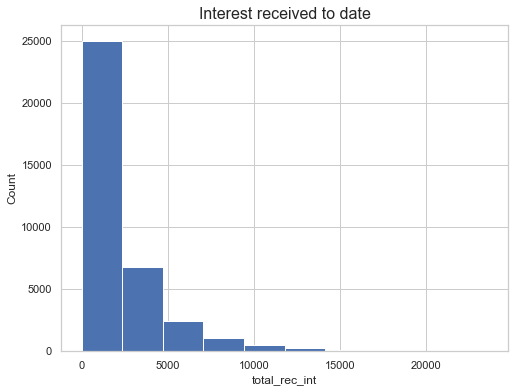

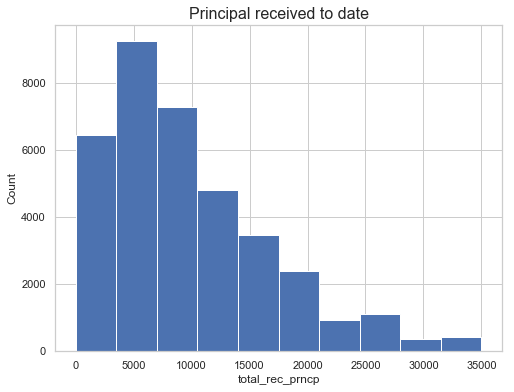

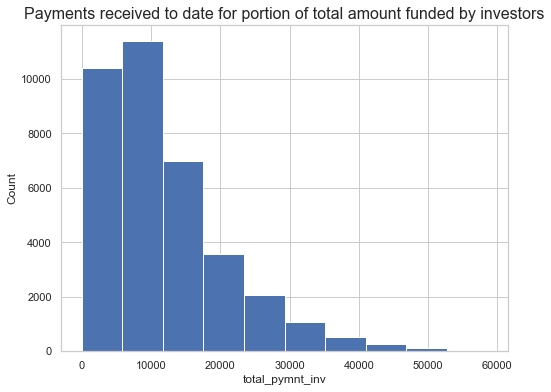

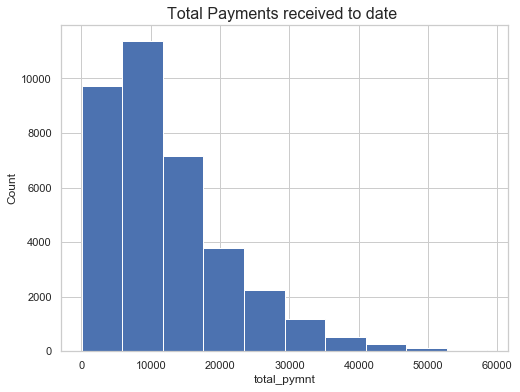

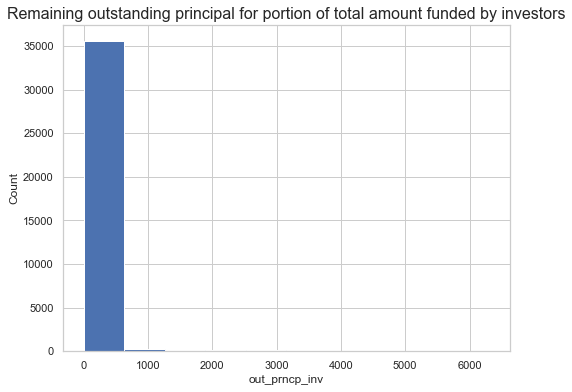

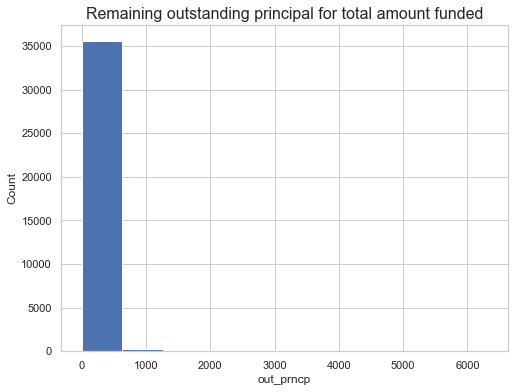

,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp
count,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,1.299840,2304.404937,9912.408471,11841.070656,12310.968657,52.213313,52.465692
std,7.065629,2629.542911,7053.212865,8911.319070,9048.420885,378.443825,379.850844
min,0.000000,6.220000,0.000000,0.000000,33.730000,0.000000,0.000000
25%,0.000000,678.010000,4800.000000,5413.410000,5672.557913,0.000000,0.000000
50%,0.000000,1379.820000,8123.600000,9632.040000,10101.589360,0.000000,0.000000
75%,0.000000,2891.860000,14000.000000,16094.490000,16700.719980,0.000000,0.000000
max,180.200000,23563.680000,35000.020000,58563.680000,58563.679930,6307.370000,6311.470000


In [42]:
# Analysing total recovery late fees 
snsdist(dfloan2["total_rec_late_fee"] , 'Late Fees recovered till date', 10,  6 , 4)
snsdist(dfloan2["total_rec_int"] , 'Interest received to date', 10,  6 , 4)
snsdist(dfloan2["total_rec_prncp"] , 'Principal received to date', 10,  6 , 4)
snsdist(dfloan2["total_pymnt_inv"] , 'Payments received to date for portion of total amount funded by investors', 10,  6 , 4)
snsdist(dfloan2["total_pymnt"] , 'Total Payments received to date ', 10,  6 , 4)
snsdist(dfloan2["out_prncp_inv"] , 'Remaining outstanding principal for portion of total amount funded by investors', 10,  6 , 4)
snsdist(dfloan2["out_prncp"] , 'Remaining outstanding principal for total amount funded', 10,  6 , 4)

dfloan2[["total_rec_late_fee" , "total_rec_int" ,"total_rec_prncp","total_pymnt_inv","total_pymnt" ,"out_prncp_inv" , "out_prncp"]].describe()

### Insights for Univariate
   - for 75% of loan customers there is no late fees. further analysis can be done on segmented univairate
   - for 75% customers interest received is less than 2900 , huge variation bw median and mean
   - principal received , total payment and payment portion for investers seems to be normally distributed . Hence most of the       money has been recovered  , more information to be checked for segmented
   - Around 75% loan customers has no outstanding balance  and mean outstanding balance is around 52 dollars.

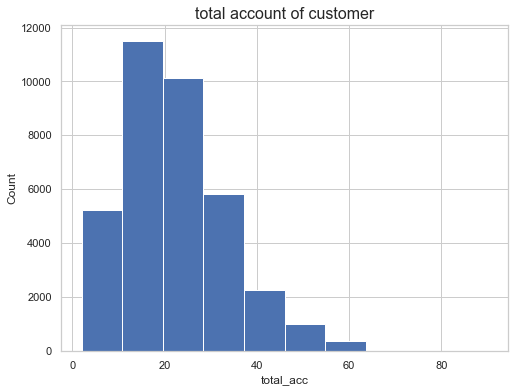

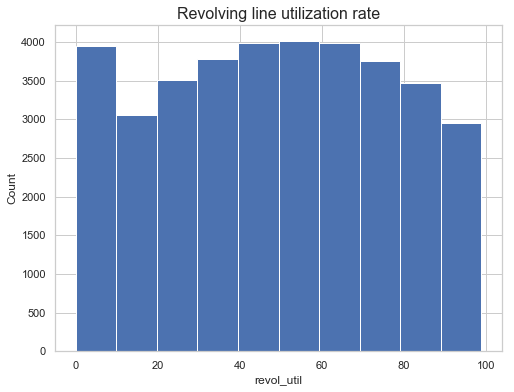

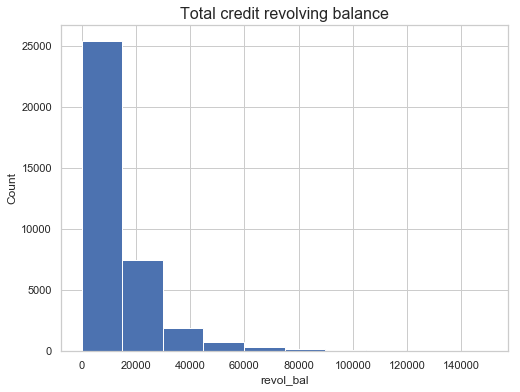

,total_acc,revol_util,revol_bal
count,36433.000000,36433.000000,36433.000000
mean,22.245876,48.836604,13465.657481
std,11.376692,28.172054,15702.093047
min,2.000000,0.000000,0.000000
25%,14.000000,26.000000,3832.000000
50%,21.000000,49.000000,9030.000000
75%,29.000000,72.000000,17231.000000
max,90.000000,99.000000,149588.000000


In [43]:
# Analyzing the total account and revolving utilization
snsdist(dfloan2["total_acc"] , 'total account of customer', 10,  6 , 4)
#converting revol_util to float 
#dfloan2['revol_util1'] =dfloan2['revol_util'].str.replace('%','').astype(float)
# using regular expression to extract numeric values from the string
import re
dfloan2['revol_util'] = dfloan2['revol_util'].apply(lambda x: float(re.findall('\d+', str(x))[0]))

snsdist(dfloan2['revol_util'] , 'Revolving line utilization rate', 10,  6 , 4)
snsdist(dfloan2['revol_bal'] , 'Total credit revolving balance', 10,  6 , 4)

dfloan2[['total_acc', 'revol_util' , 'revol_bal']].describe()


###  Univariate Insights on total account and revolving utilization
   - Average loan customers have around 21 to 22 total accounts 
   - Most of the cusotmers have revolving balance utilization of around 49% . as we know lesser the utilization , better will        be credit score
   - 75% customers has revolving balance less than 17232 and there is huge difference be mean and median
    

,pub_rec,open_acc,inq_last_6mths,delinq_2yrs
count,36433.000000,36433.000000,36433.00000,36433.000000
mean,0.053715,9.351604,0.86493,0.146131
std,0.234995,4.373772,1.06343,0.492199
min,0.000000,2.000000,0.00000,0.000000
25%,0.000000,6.000000,0.00000,0.000000
50%,0.000000,9.000000,1.00000,0.000000
75%,0.000000,12.000000,1.00000,0.000000
max,4.000000,44.000000,8.00000,11.000000


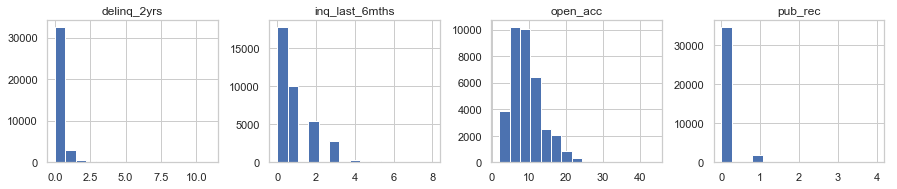

In [44]:
#analyzing below columns
dfloan2[['pub_rec' ,'open_acc','inq_last_6mths' ,'earliest_cr_line', 'delinq_2yrs' ]].hist(bins=15, figsize=(15, 6), layout=(2, 4));
dfloan2[['pub_rec' ,'open_acc','inq_last_6mths' ,'earliest_cr_line', 'delinq_2yrs' ]].describe()

### Univariate Analysis Insights  on public Records , open accounts, credit inquiries , delinq
   - Most of the loan customers has no public derogatory records 
   - 50% people has open accounts b/w 6 to 12  , with average and median of 9 accounts
   - 75 % people has no credit enquiries in last 6 months
   - in past 2 years most of the loan customers has no delinquency Avergae os 0.14 and max is 11 . 

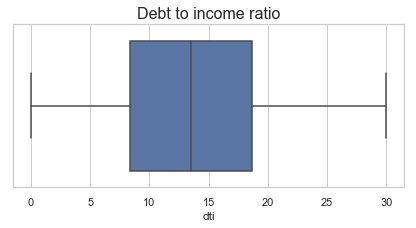

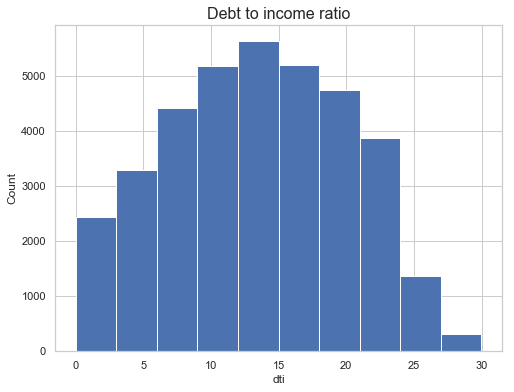

,dti
count,36433.000000
mean,13.444131
std,6.643308
min,0.000000
25%,8.360000
50%,13.540000
75%,18.690000
max,29.990000


In [45]:
# Analyzing the important column Debt to income ratio dti 
plotboxonevar(dfloan2["dti"] , 'Debt to income ratio',7 , 3)
snsdist(dfloan2['dti'] , 'Debt to income ratio', 10,  7 , 3)
dfloan2[['dti']].describe()

### Debt to income ratio is normally distributed . 75% loan customer have dti less than 19%

# Driver analysis
-  As we know that our objective is to find out the main drivers  which provide strong indication of deafulting a loan    
   application.
-  we can see that there different categories of columns related to loan applicant  like its name age , employment etc then     
   related to loan like loan amount , installement rate , grade , subgrade etc . and columns post loan is assigned like 
   recoveries , toal payment received , last payment date etc.
-  post assigned loan columns can be excluded now from the analysis as these will not help in predicting the default loan

   

In [46]:
# we can see below are the post assigned columns excluding id and member id also as these columns are unique 
postassignedloancols = [
'id',
'member_id',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
'inq_last_6mths',
'delinq_2yrs',
]
dfloan3 = dfloan2.loc[:,~dfloan2.columns.isin(postassignedloancols)]


In [47]:
ColsOverview(dfloan3)

,colName,dtypes,Missingval,UniqueVal,TopVal
0,loan_amnt,int64,0,863,10000
1,funded_amnt,int64,0,1024,10000
2,funded_amnt_inv,float64,0,7474,5000
3,term,object,0,2,36 months
4,int_rate,object,0,334,10.99%
5,installment,float64,0,14367,311.11
6,grade,object,0,7,B
7,sub_grade,object,0,35,B3
8,emp_title,object,0,28207,US Army
9,emp_length,object,0,11,10+ years


In [48]:
#There are 3 categories of loan status
dfloan3.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [49]:
# Current loan status can be excluded from analysis as it will not add any value as user is still availing loan 
# we will be analyzing either fully paid loans or default loans .
dfloan3 = dfloan3[dfloan3.loan_status!='Current']
dfloan3.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [50]:
#Converting fully paid and charged off to 0 and 1
dfloan3.loan_status = dfloan3.loan_status.apply(lambda x : 0 if x=='Fully Paid' else 1)
#converting to numeric 
dfloan3.loan_status = dfloan3.loan_status.apply(lambda x :pd.to_numeric(x))
#checking the default percentage 
print(dfloan3.loan_status.value_counts())


0    30424
1     4943
Name: loan_status, dtype: int64


In [51]:
# checking the fully paid and default percentage which is 86% and 14 %
print( [ round(i/len(dfloan3.index) , 3) for i in dfloan3.loan_status.value_counts().tolist()])


[0.86, 0.14]


In [52]:
#Creating unique function to plot the loan status vs loan amount 
def plotbaragainstloanStatus(xvar, graphTitle):  #, order_list=None) :   
    #plt.figure(figsize=(7,5))
    sns.barplot(x=xvar , y = dfloan3.loan_status )#, order=order_list)
    plt.title(graphTitle, fontsize=16)
    #plt.ylabel('Loan Status', fontsize=12)
    #plt.xlabel(xLabel, fontsize=12)
    #plt.xticks(rotation = rotation)
    plt.show();

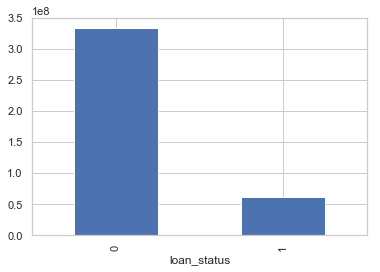

In [53]:
# we can see more amount for fully paid
dfloan3.groupby('loan_status')['loan_amnt'].sum().plot.bar()
plt.show()

In [54]:
#To plot numerical with categorical , we can divide the amount in buckets 
def loanamtbuckets(x):
    if x<=5000:
        return 'lowAmount'
    if 5000<x<=10000:
        return 'MediumAmount'
    if 10000<x<=20000:
        return 'HighAmount'
    else:
        return'VeryHigh'

In [55]:
#calling function to divide the amount in categorical variables
dfloan3.loan_amnt= dfloan3.loan_amnt.apply( lambda x: loanamtbuckets(x))

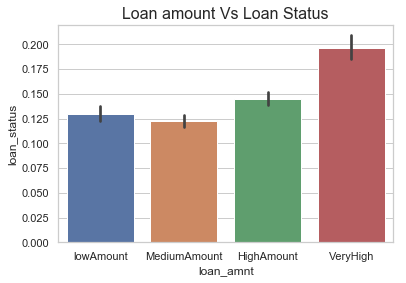

In [56]:
#now we can plot loan amount with loan status. we can clearly see that loan amount > 20000 has high default rate
plotbaragainstloanStatus(dfloan3.loan_amnt ,'Loan amount Vs Loan Status')

In [57]:
#similarly converting funded amount to categories
dfloan3.funded_amnt= dfloan3.funded_amnt.apply( lambda x: loanamtbuckets(x))

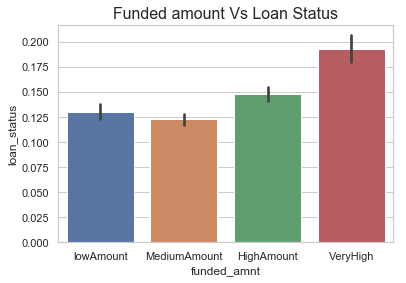

In [58]:
#now we can plot funded amount with loan status. we can clearly see that loan amount > 20000 has high default rate
plotbaragainstloanStatus(dfloan3.funded_amnt ,'Funded amount Vs Loan Status')

In [59]:
#similarly converting funded_amnt_inv (amount commited by investers) to categories
dfloan3.funded_amnt_inv= dfloan3.funded_amnt_inv.apply( lambda x: loanamtbuckets(x))

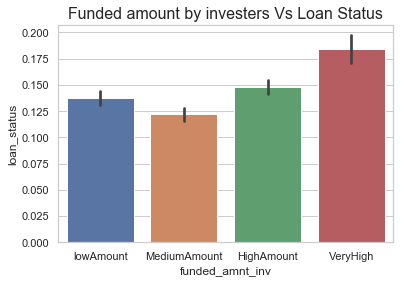

In [60]:
# results are similar to loan amount and funded amount, high loan default rate for very high amount
plotbaragainstloanStatus(dfloan3.funded_amnt_inv ,'Funded amount by investers Vs Loan Status')

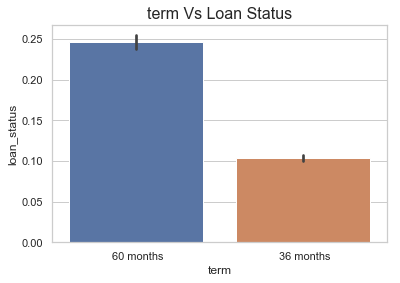

In [61]:
# ploting term vs Loan status
plotbaragainstloanStatus(dfloan3.term ,'term Vs Loan Status')

In [62]:
# interest rate  relation with loan status 
# Extracting only float value from interest rate  
dfloan3.int_rate = dfloan3.int_rate.apply(lambda x: float(re.findall('\d+\.\d+', str(x))[0]))

 we can see that loan with 60 months term are more defaulted, which means users who opt for less term are better

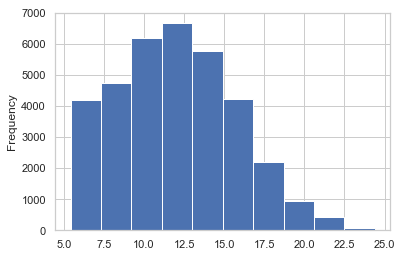

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [63]:
# We can see that most of the loan users interest rate bw 10 to 15 %
dfloan3.int_rate.apply(lambda x: float(re.findall('\d+\.\d+', str(x))[0])).plot.hist()
plt.show()
dfloan3.int_rate.describe()

In [64]:
# Binning of interest rate by qcut 
dfloan3.int_rate = pd.qcut(dfloan3.int_rate, [0 , 0.20 , 0.40, 0.60,0.80, 1 ] ,[ 'VL' , 'L' , 'M' ,'H' , 'VH'])

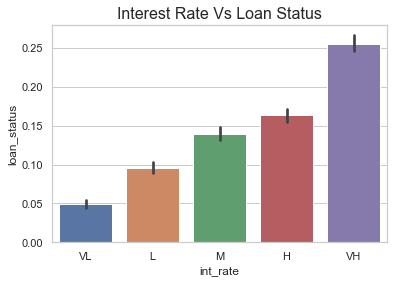

In [65]:
#plotting interestrate with loan status # Users with high interest rate are defaulty
plotbaragainstloanStatus(dfloan3.int_rate ,'Interest Rate Vs Loan Status')

loan customers with high interest rate are more defauly .Interest rate is increasing , we can see loan default is also increasing. we can see strong relation bw these 2 

In [66]:
#pivot table also shows that for VH interest rate .. there are more chance of loan status to be defaulted
pd.pivot_table(dfloan3 , values = 'loan_status' ,  columns='int_rate')

int_rate,VL,L,M,H,VH
loan_status,0.049508,0.096244,0.139581,0.163716,0.255847


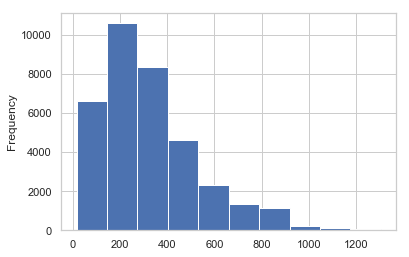

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

In [67]:
#checking the distribution of installment , most of the installment are bw 200 to 400 
dfloan3.installment.plot.hist()
plt.show()
dfloan3.installment.describe()

In [68]:
# lets do binning of installment by qcut 
dfloan3.installment = pd.qcut(dfloan3.installment, [0 , 0.20 , 0.40, 0.60,0.80, 1 ] ,[ 'VL' , 'L' , 'M' ,'H' , 'VH'])

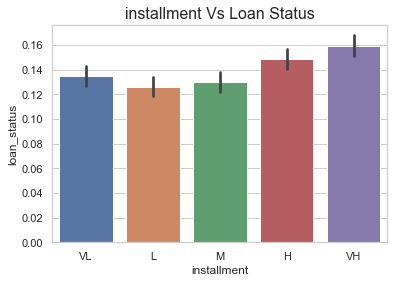

In [69]:
#plotting installment with loan status # there are not much changes bw all the installment buckets 
#but loans with high Installments seems to be more defaulted
plotbaragainstloanStatus(dfloan3.installment ,'installment Vs Loan Status')

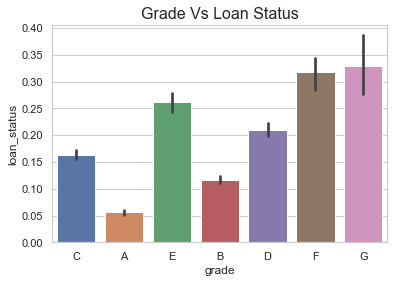

In [70]:
#plotting grade with loan status. Univariate analysis shows that no of loan applicatin for G grade were higest 
# hence number of default are also high for G grade followed by F and E
plotbaragainstloanStatus(dfloan3.grade ,'Grade Vs Loan Status')


In [71]:
#pivot table to see the exact value of grades , 33% of grade G applications are defaulted. It seems to be strong indicater
pd.pivot_table(dfloan3 , values = 'loan_status' ,  columns='grade')

grade,A,B,C,D,E,F,G
loan_status,0.056127,0.116906,0.16293,0.210165,0.261185,0.317073,0.329787


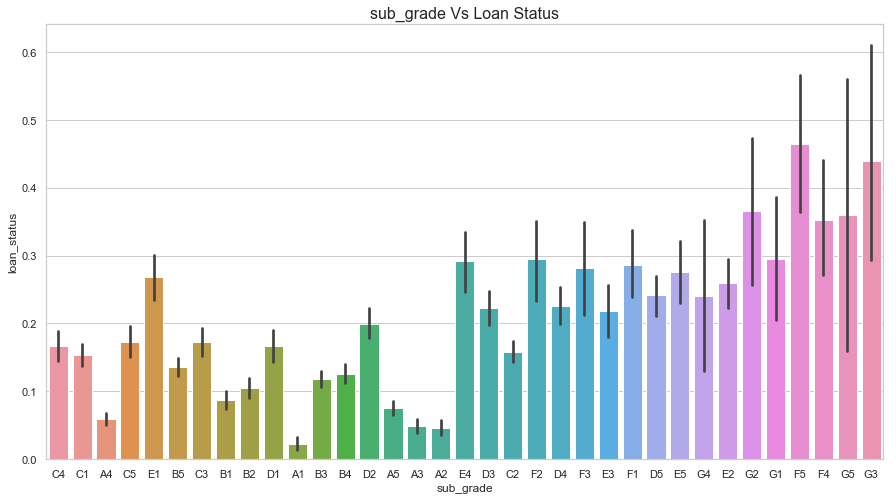

In [72]:
#loan with f5 grade are more defaulty followed by G3 and G2, this also seems to be strong indicator as
# 45% of loans are default for F5 grade
plt.figure(figsize=[15,8])
plotbaragainstloanStatus(dfloan3.sub_grade ,'sub_grade Vs Loan Status' )
plt.show()

In [73]:
dfloan3.emp_title.str.upper().value_counts()

US ARMY                                                         202
BANK OF AMERICA                                                 131
AT&T                                                             77
WALMART                                                          77
IBM                                                              67
KAISER PERMANENTE                                                67
WELLS FARGO                                                      65
VERIZON WIRELESS                                                 62
UPS                                                              60
USPS                                                             57
SELF                                                             56
US AIR FORCE                                                     55
USAF                                                             53
WALGREENS                                                        51
SELF EMPLOYED                                   

In [74]:
#employee title 
#plt.figure(figsize=[15,8])
#plotbaragainstloanStatus(dfloan3.emp_title.str.upper() ,'empTitle Vs Loan Status' )
#plt.show()

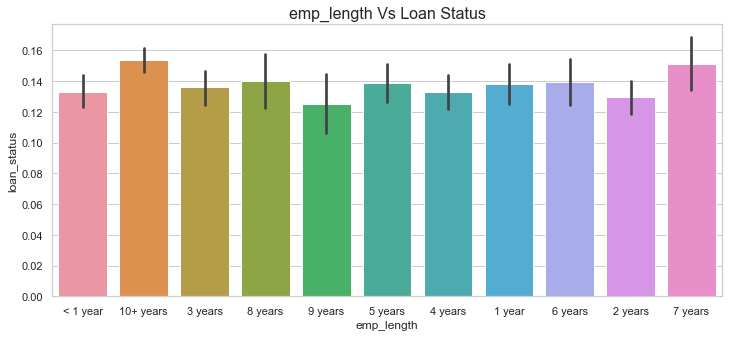

In [78]:
#checking distribution of employee length. Default rate looks constant for most of the employee expereince.
#However customer with 10+ years have slightly more default rate .. as they are the highest loan customers in our dataset
plt.figure(figsize=[12,5])
plotbaragainstloanStatus(dfloan3.emp_length ,'emp_length Vs Loan Status' )
plt.show()

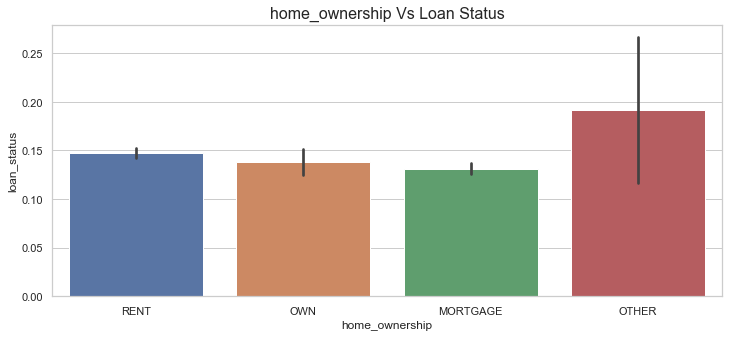

In [79]:
# Home ownership :-  Other loan customer are  more defaulter followed by Rented one
plt.figure(figsize=[12,5])
plotbaragainstloanStatus(dfloan3.home_ownership ,'home_ownership Vs Loan Status' )
plt.show()

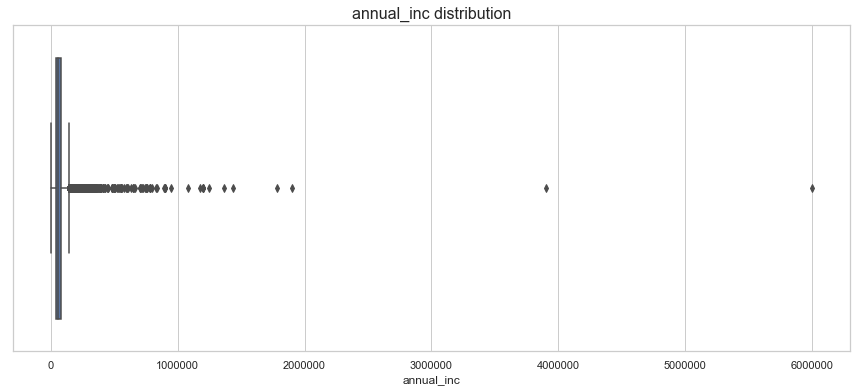

count      35367.000000
mean       69095.985393
std        63967.047428
min         4000.000000
0%          4000.000000
10%        30000.000000
20%        38004.000000
30%        45000.000000
40%        51000.000000
50%        60000.000000
60%        66000.000000
80%        90000.000000
100%     6000000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [96]:
#checking the distribution of employee income
plotboxonevar(dfloan3["annual_inc"] , 'annual_inc distribution', 15 , 6)
dfloan3.annual_inc.describe( percentiles = [0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.8, 1]).apply(lambda x: format(x, 'f'))

In [98]:
# lets do binning of annual income by qcut 10% , 10 to 30 % , 30 -60 , 60-80 and 80 -100
dfloan3.annual_inc = pd.qcut(dfloan3.annual_inc, [0 , 0.10 , 0.30, 0.60,0.80, 1 ] ,[ 'VL' , 'L' , 'M' ,'H' , 'VH'])

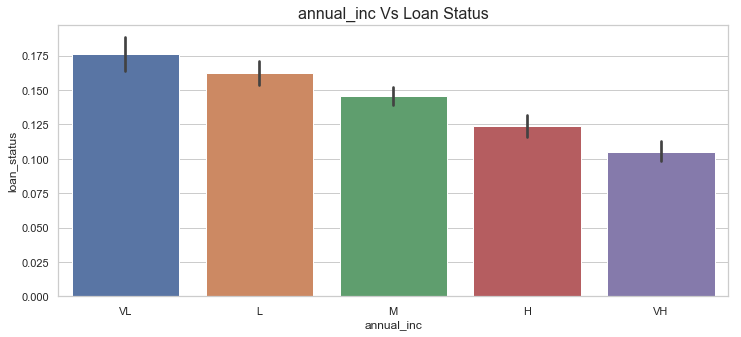

In [99]:
# we can clearly see strong indication of annual income with loan status . people with very low income tends to 
# be defaulty. 
plt.figure(figsize=[12,5])
plotbaragainstloanStatus(dfloan3.annual_inc ,'annual_inc Vs Loan Status' )
plt.show()

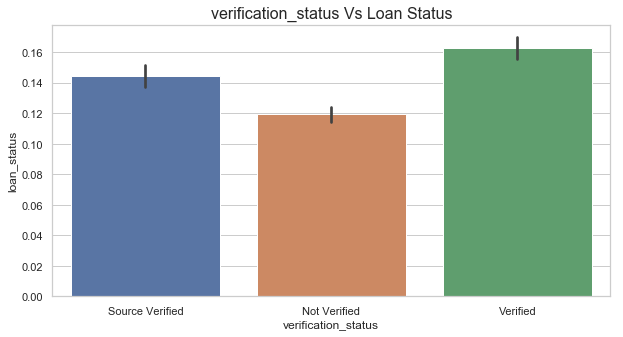

In [103]:
#Verification vs Loan Status . surprisingly verified loan customer are more defaulty followed by source verified and not verified
plt.figure(figsize=[10,5])
plotbaragainstloanStatus(dfloan3.verification_status ,'verification_status Vs Loan Status' )
plt.show()


In [ ]:
sns.pairplot(dfloan3)